In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [17]:
file_path = "A:/AIML/Kaggle Competitions/Titanic/Titanic/train.csv"
df = pd.read_csv(file_path)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df_encoded = pd.get_dummies(df, columns=["Sex","Embarked"])

y_train = df_encoded["Survived"]
y_train = y_train.astype(float).to_numpy()
df_encoded = df_encoded.drop(columns=["Survived"])
x_train = df_encoded.astype(float).to_numpy()

print(x_train)
print(y_train)

[[ 3.     22.      7.25   ...  0.      0.      1.    ]
 [ 1.     38.     71.2833 ...  1.      0.      0.    ]
 [ 3.     26.      7.925  ...  0.      0.      1.    ]
 ...
 [ 3.     28.     23.45   ...  0.      0.      1.    ]
 [ 1.     26.     30.     ...  1.      0.      0.    ]
 [ 3.     32.      7.75   ...  0.      1.      0.    ]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 

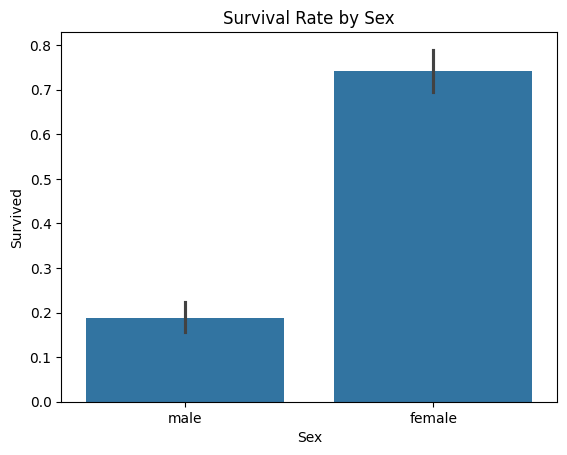

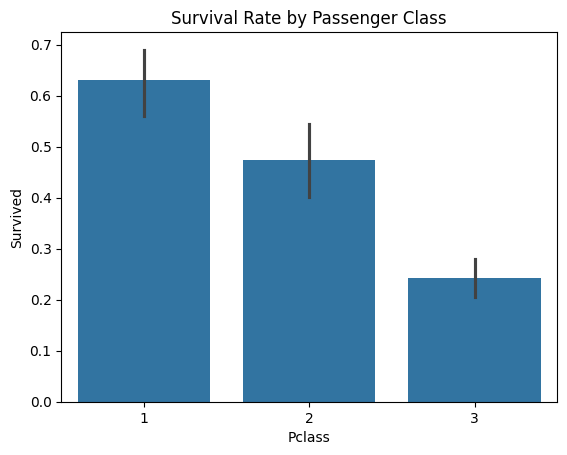

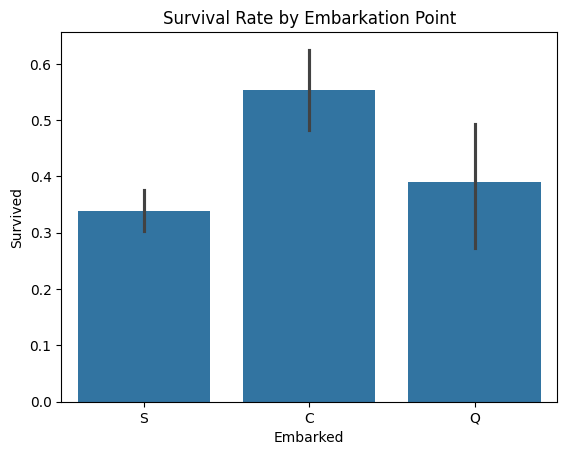

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Bar plot for Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Bar plot for Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.show()


In [18]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [19]:
def compute_cost (X,y,w,b):
    cost = 0 
    m = X.shape[0]
    for i in range (m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    cost /= m
    return cost

In [21]:
def compute_gradient(X,y,w,b):
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0 
    for i in range (m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        err = (f_wb_i - y[i])
        dj_db += err
        for j in range (n):
            dj_dw[j] += err * X[i,j]
    dj_db /= m 
    dj_db /= m
    return dj_dw,dj_db

In [23]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range (num_iters):
        dj_dw, dj_db = gradient_function(X,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        #This is primarily for plotting purposes only
        J_history.append(cost_function(X,y,w,b))
        #This is to check cost with iterations 
        if (i%10 == 0):
            print(f"Iteration: {i:4d} Cost: {J_history[-1]:8.2f}")
    return J_history,w,b

In [25]:
def z_score_normalization (X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma

    return X_norm,mu,sigma

In [ ]:
n = x_train.shape[1]
initial_w = np.zeros(n)
initial_b = 0
alpha = 0.01
iterations = 10000
X_norm, mu, sigma = z_score_normalization(x_train)

J_hist, final_w, final_b = gradient_descent(X_norm,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)

print(f"Final w found : {final_w} and final b found is {final_b}")

In [47]:
def model_prediction(X,w,b):
    m = X.shape[0]
    y_pred = np.zeros(m)
    for i in range (m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        y_pred[i] = (f_wb_i >= 0.5).astype(int)
    return y_pred

In [48]:
#This is to check accuracy of the model 
from sklearn.metrics import accuracy_score

y_pred = model_prediction(X_norm,final_w,final_b)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.7104377104377104


In [43]:
#This is to nomralise and clean the test dataset
test_file_path = "A:/AIML/Kaggle Competitions/Titanic/Titanic/test.csv"
ef = pd.read_csv(test_file_path)

ef['Age'] = ef['Age'].fillna(ef['Age'].median())
ef['Fare'] = ef['Fare'].fillna(ef['Fare'].median())
ef['Embarked'] = ef['Embarked'].fillna(ef['Embarked'].mode()[0])

ef_encoded = pd.get_dummies(ef,columns=["Sex","Embarked"])

x_test = ef_encoded.astype(float).to_numpy()

x_test_norm,mu,sigma = z_score_normalization(x_test)


In [49]:
#This is to generate the y_test
y_test = model_prediction(x_test_norm,final_w,final_b)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.

In [51]:
#This is to put it into csv
start_id = 892
passenger_ids = np.arange(start_id, start_id + len(y_test))
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_test.astype(int)  
})
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
